In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
img = cv2.imread("image0.jpg")

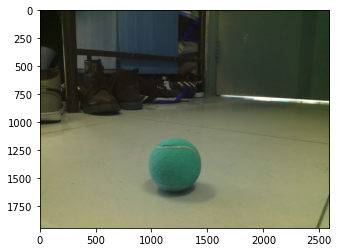

In [5]:
plt.imshow(img)

In [6]:
img = cv2.GaussianBlur(img, (5, 5), 5)

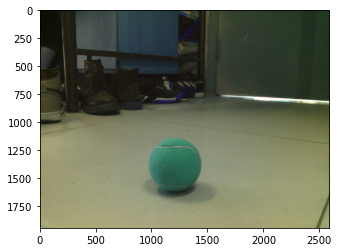

In [7]:
plt.imshow(img)

In [8]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

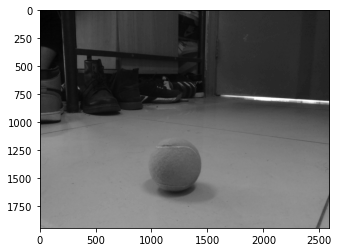

In [9]:
plt.imshow(gray_img, cmap=plt.cm.gray)

In [10]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

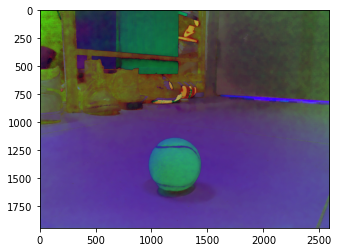

In [11]:
plt.imshow(hsv_img, cmap=plt.cm.hsv)

In [12]:
hist = img[1250:1500, 1200:1400]

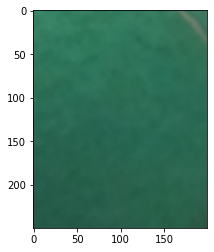

In [13]:
plt.imshow(hist)

In [14]:
hist = cv2.cvtColor(hist, cv2.COLOR_BGR2HSV)

In [15]:
hist_H = cv2.calcHist([hist], [0], None, [181], [0, 180])
hist_S = cv2.calcHist([hist], [1], None, [256], [0, 255])
hist_V = cv2.calcHist([hist], [2], None, [256], [0, 255])

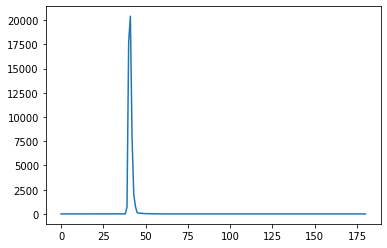

In [16]:
plt.plot(hist_H)

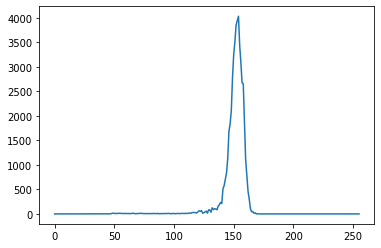

In [17]:
plt.plot(hist_S)

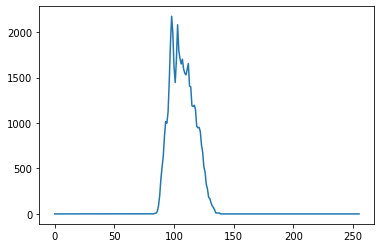

In [18]:
plt.plot(hist_V)

In [19]:
lower = np.array([35, 130, 80])
higher = np.array([50, 170, 140])

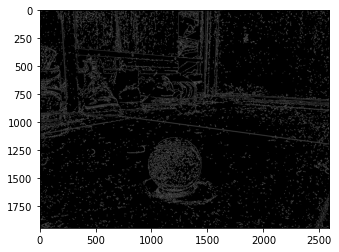

In [20]:
edge = cv2.Canny(gray_img, 5, 10)
plt.imshow(edge, cmap=plt.cm.gray)

In [21]:
circles = cv2.HoughCircles(edge, cv2.HOUGH_GRADIENT, 1, 60, param1=100, param2=100, minRadius=100, maxRadius=300)

In [22]:
circles.shape

(1, 5, 3)

In [23]:
import copy

5


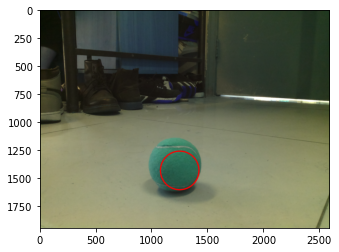

In [24]:
# fig, ax = plt.subplots(3, 4)
img_out = copy.copy(img)
if circles is not None:
    x = circles[0][:, 0].astype(int)
    y = circles[0][:, 1].astype(int)
    r = circles[0][:, 2].astype(int)
    s_r = (r/1.5).astype(int)
    num = len(circles[0])
    rate = np.zeros(num)
    print(num)
    for i in range(num):
        detect_area = (hsv_img[y[i]-s_r[i]:y[i]+s_r[i], x[i]-s_r[i]:x[i]+s_r[i]])
        # ax[i//5][i%5].imshow(detect_area, cmap=plt.cm.hsv)
        height, width, channel = detect_area.shape
        if height != 0 and width != 0:
            tennis_color_mask = cv2.inRange(detect_area, lower, higher)
            num_point = np.sum(tennis_color_mask/255)
            rate[i] = num_point / (height * width)
            #img_out = cv2.circle(img, (x[i], y[i]), r[i], (255, 0, 0), thickness=2)
            #ax[i//4][i%4].imshow(img_out)
    i = np.argmax(rate)
    if rate[i] > 0.4:
        x_pos = x[i]
        y_pos = y[i]
        radius = r[i]
img_out = cv2.circle(img_out, (x_pos, y_pos), radius, (255, 0, 0), thickness=10)
plt.imshow(img_out)
    
            